In [17]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('../data/default-of-credit-card-clients.csv')
df = df.rename(columns={"PAY_0": "PAY_1"}, errors="raise")
df.drop(columns=['ID'],inplace=True)

## Partitioning

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

y, X = df["default payment next month"], df.drop("default payment next month", axis=1)

random_state = 42
ts = 0.25


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,
                                                    stratify= y, random_state=random_state)

# drop the ones with a low correlation??

## Scaling

In [8]:
train_mean, train_std = X_train.mean(0), X_train.std(0)
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

## PCA

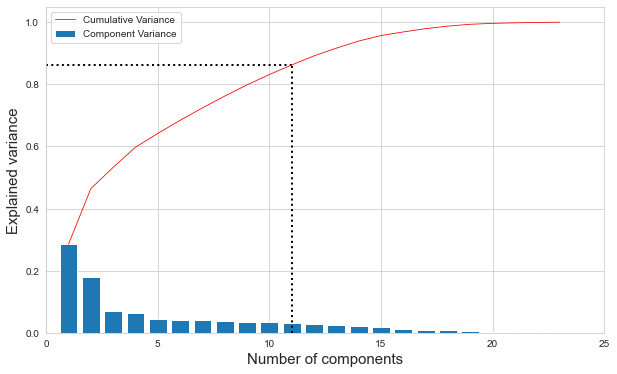

In [62]:
from sklearn.decomposition import PCA


fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(0,25)

# center ?? 
pca = PCA(n_components= X_train_scaled.shape[1], random_state=random_state)
X_train_reduced = pca.fit_transform(X_train_scaled)

ax.bar(range(1,len(pca.explained_variance_ratio_ )+1),
         pca.explained_variance_ratio_, 
        label="Component Variance",
        )
ax.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Variance",
         linewidth = 0.8
        )

plt.vlines(x=11, ymin=0, ymax=0.863, colors='black', ls=':', lw=2)
plt.hlines(y=0.863, xmin=0, xmax=11, colors='black', ls=':', lw=2)

ax.set_ylabel('Explained variance', fontdict= {"size":15})
ax.set_xlabel('Number of components', fontdict= {"size":15})
ax.legend(loc='upper left')
plt.savefig('../images/10-PCA.svg')
plt.show()

# add annotations??

In [ ]:
cs = np.cumsum(pca.explained_variance_ratio_)
threshold = .85
mask = cs < threshold
n = sum(mask) + 1
pca_scores = {}
pca_gs_trained_models = {}